# Optimal Execution of Trades in the FX Market

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm

sns.set(rc = {"figure.figsize":(16, 9)})

In [76]:
class OnlineData:

    def __init__(self, filename):
        self.filename = filename
        self.f = open(filename, 'r')
        self.TotalQ = 1

    def __next__(self):
        line = next(self.f)[:-1]
        if len(line) < 1:
            return None
        Q_, P_ = np.array([z[1:-1].split(",") for z in line.split("\t")
                          ]).astype(float).astype(int).T
        CS = np.cumsum(P_ * np.ediff1d(Q_, to_begin=Q_[0]))

        self.TotalQ = sum(Q_)

        def F(Q):
            if Q <= Q_[0]:
                return P_[0] * Q
            if Q > Q_[-1]:
                return None
            i = np.searchsorted(Q_, Q)
            return CS[i - 1] + (Q - Q_[i - 1]) * P_[i]

        self.F = F
        return self.F

    def __iter__(self):
        return self

    def close(self):
        self.f.close()

In [79]:
def SrtategyMI(numbers: np.array, 
               times: np.array,
               orderbook_bid: OnlineData,
               dQfilename,
               marketIfilename):
        
        i = 0

        dQ = open(dQfilename, 'w+')
        marketI = open(marketIfilename, 'w+')

        for t in range(max(times) + 1):
            BuyPrice = next(orderbook_bid)

            if t in times:
                 deltaQ = numbers[i] / orderbook_bid.TotalQ
                 MarkI = (BuyPrice(numbers[i] + 1) - BuyPrice(numbers[i])) / BuyPrice(1) - 1
                 dQ.write(str(deltaQ) + " ")
                 marketI.write(str(MarkI) + " ")
                 print(f"time: {t} Ask: {BuyPrice(1)} BuyPrice: {BuyPrice(numbers[i]) / numbers[i]} MI: {MarkI}")
                 i += 1


        dQ.close()
        marketI.close()
                  

In [80]:
dQ = 'deltaQ.tsv'
marketI = 'marketimpact.tsv'
file1 = 'data_parsing/data/ask.tsv'
file2 = 'data_parsing/data/bid.tsv'
orderbook_bid = OnlineData(file2)
orderbook_ask = OnlineData(file1)

SrtategyMI(np.full((30, ), 200000), np.arange(20, 770, 25), orderbook_bid, dQ, marketI)

time: 20 Ask: 23629 BuyPrice: 23832.69 MI: 1.022303102120276
time: 45 Ask: 23629 BuyPrice: 23677.43 MI: 1.002750856997757
time: 70 Ask: 23599 BuyPrice: 23636.38 MI: 1.002796728674944
time: 95 Ask: 23599 BuyPrice: 23625.13 MI: 1.002796728674944
time: 120 Ask: 23599 BuyPrice: 23625.13 MI: 1.002796728674944
time: 145 Ask: 23591 BuyPrice: 23612.325 MI: 1.0027976770802425
time: 170 Ask: 23359 BuyPrice: 23404.435 MI: 1.0027398433152104
time: 195 Ask: 23351 BuyPrice: 23381.22 MI: 1.002783606697786
time: 220 Ask: 23315 BuyPrice: 23351.2 MI: 1.002787904782329
time: 245 Ask: 23315 BuyPrice: 23351.775 MI: 1.002787904782329
time: 270 Ask: 23315 BuyPrice: 23351.775 MI: 1.002787904782329
time: 295 Ask: 23315 BuyPrice: 23351.775 MI: 1.002787904782329
time: 320 Ask: 23315 BuyPrice: 23351.775 MI: 1.002787904782329
time: 345 Ask: 23315 BuyPrice: 23351.775 MI: 1.002787904782329
time: 370 Ask: 23315 BuyPrice: 23351.775 MI: 1.002787904782329
time: 395 Ask: 23315 BuyPrice: 23351.775 MI: 1.002787904782329
ti

## TWAP

In [3]:
file1 = 'data_parsing/data/ask.tsv'
file2 = 'data_parsing/data/bid.tsv'
orderbook_bid = dataloader.OnlineData(file2)
orderbook_ask = dataloader.OnlineData(file1)

ACPR = []

T = 200
W = np.array([5000, 2000, 3000]) 
start = 5
num = T - (start - 1)

ELL = np.linspace(start = start, stop = T, num = num, endpoint = True, dtype = int)

In [4]:
file1 = 'data_parsing/data/ask.tsv'
file2 = 'data_parsing/data/bid.tsv'
orderbook_bid = dataloader.OnlineData(file2)
orderbook_ask = dataloader.OnlineData(file1)

ACPR = []

T = 200
W = np.array([5000, 2000, 3000]) 
start = 5
num = T - (start - 1)

ELL = np.linspace(start = start, stop = T, num = num, endpoint = True, dtype = int)

for L in tqdm(ELL):

    orderbook_bid = dataloader.OnlineData(file2)
    orderbook_ask = dataloader.OnlineData(file1)
    twap = execution.TWAP(T, L , W)
    ACPR_twap = twap.cumulative_impact(orderbook_bid=orderbook_bid, orderbook_ask=orderbook_ask)*100
    orderbook_ask.close()
    orderbook_bid.close()
    ACPR.append(ACPR_twap)

ACPR_TWAP = np.array(ACPR) 

100%|██████████| 196/196 [00:10<00:00, 19.19it/s]


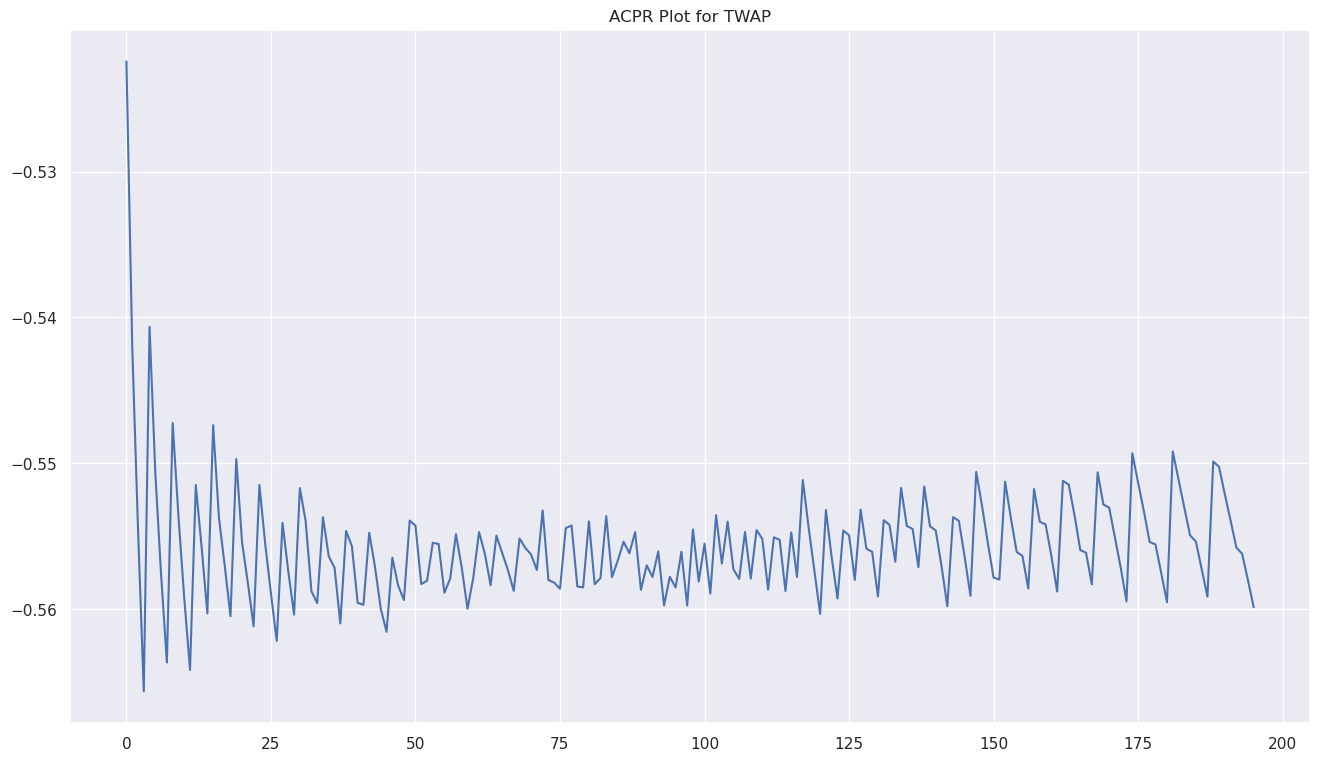

In [28]:
plt.title("ACPR Plot for TWAP")
sns.lineplot(ACPR_TWAP);

## Joint backtest

In [4]:
T = 50
W = np.ones(shape=10, dtype=int) * 500

W_max = 501  #only for GLOBE

lamb = 2 * (0.01)
eta = 2 * (0.001)
init_sigma = 0.021713089727230926

start = 2
stop = T
num = 49

skip = 0
rounds_for_est = 15

K = 100000.

instruments = ['USD_CNH_T+1', 'USD_RUB_T+1']
dates = [["2022-10-04", "2022-10-20", "2022-11-01", "2022-11-15"],
         ["2022-10-03", "2022-10-04", "2022-10-05", "2022-10-06", 
          "2022-10-07", "2022-10-10", "2022-10-11", "2022-10-12", 
          "2022-10-13", "2022-10-14", "2022-10-17", "2022-10-18", 
          "2022-10-19", "2022-10-20", "2022-10-21", "2022-10-24", 
          "2022-10-25", "2022-10-26", "2022-10-27", "2022-10-28", 
          "2022-10-31", "2022-11-01", "2022-11-02", "2022-11-03", 
          "2022-11-07", "2022-11-08", "2022-11-09", "2022-11-10", 
          "2022-11-11"]]

start_names = []
files = []

for i, instrument in enumerate(instruments):
    for date in dates[i]:
        files.append(('data_parsing/data/' + instrument + '__' + date + '_PQ_' + 'ask.tsv', 
                      'data_parsing/data/' + instrument + '__' + date + '_PQ_' + 'bid.tsv'))
        start_names.append(instrument + ' ' + date)

path = 'report/fig/'

file_backtest = open('report/backtest.tex','w')

for (file1, file2), start_name in zip(files, start_names):        
    filename = start_name + ' T = ' + str(T) + ' W = ' + str(W[0]) + '.pdf'
    LaTeX_caption = "ACPR and RI metrics on {} with $T = {}$ and $W = {}$".format(start_name.replace('_', '\_'), str(T), str(W[0]))
    title = None

    params_GLOBE = {
        'lamb': lamb,
        'eta': eta,
        'init_sigma': init_sigma,
        'W_max': W_max,
        'K': K
    }
    params_GLOBE_plus = {
        'lamb': lamb,
        'eta': eta,
        'init_sigma': init_sigma,
        'W_max': W_max,
        'K': K
    }
    params_AC = {'lamb': lamb, 'eta': eta, 'init_sigma': init_sigma}
    params_TWAP = {}

    default_params = {
        'T': T,
        'W': W,
        'start': start,
        'stop': stop,
        'num': num,
        'skip': skip,
        'rounds_for_est': rounds_for_est,
        'file1': file1,
        'file2': file2,
        'filename': path + filename,
        'title': title
    }
    params = {
        'TWAP': params_TWAP,
        'AC': params_AC,
        'GLOBE': params_GLOBE,
        'GLOBE+': params_GLOBE_plus
    }

    ACPR, RI = misc.calc_and_plot_all_ACPR_RI(**default_params, **params, savefig=True)

    file_backtest.write("\\begin{figure}[htbp]\n")
    file_backtest.write("\t\\includegraphics[width=\\textwidth]{" + filename + "}\n")
    file_backtest.write("\t\\caption{" + LaTeX_caption + "}\n")
    file_backtest.write("\\end{figure}\n\n")

file_backtest.close()

100%|██████████| 49/49 [00:19<00:00,  2.46it/s]
